In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
raw_data=pd.read_csv('scrap price (1).csv')

In [3]:
raw_data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
raw_data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
# check for null values
raw_data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# dropping uneccessary column
data=raw_data.drop('ID',axis=1)

In [7]:
data

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
# check for duplicates
data.duplicated().sum()

0

In [9]:
# check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   name              205 non-null    object 
 2   fueltypes         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumbers       205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheels       205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
data.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
# replacing the column 'name' with a new one 'Car_name'
# Inserted the new colum in place of name
# Splitting the names only to fecth brands by removing models

Car_name=data['name'].apply(lambda x : x.split(' ')[0])
data.insert(2,'Car_name',Car_name)
data.drop(['name'],axis=1,inplace=True)

In [12]:
data

,symboling,Car_name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
data['Car_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# creating a dictionary to replace the wrong spelling with the correct ones


data['Car_name']=data['Car_name'].replace({
    'alfa-romero':'alfa-romeo',
    'maxda' : 'mazda',
    'nissan' : 'Nissan',
    'porcsche' : 'porsche',
    'toyouta' : 'toyota',
    'vokswagen' : 'volkswagen',
    'vw' : 'volkswagen',
    'porcshce':'porsche'
})

In [15]:
data['Car_name'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
# OUTLIERS

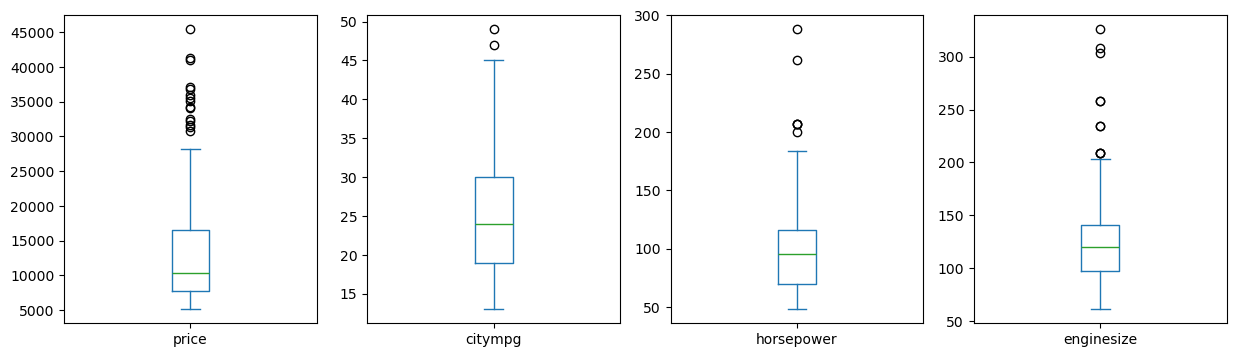

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
data.price.plot(kind='box')

plt.subplot(1,4,2)
data.citympg.plot(kind='box')

plt.subplot(1,4,3)
data.horsepower.plot(kind='box')

plt.subplot(1,4,4)
data.enginesize.plot(kind='box')

plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   Car_name          205 non-null    object 
 2   fueltypes         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumbers       205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheels       205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [19]:
data["price"] = data["price"].astype(int)
data1 = data[["price","citympg","horsepower","enginesize"]]

In [20]:
# Quantiles AND iqr
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)

IQR = Q3 - Q1

In [21]:
IQR


price         8715.0
citympg         11.0
horsepower      46.0
enginesize      44.0
dtype: float64

In [22]:
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)

In [23]:
uf

price         29575.5
citympg          46.5
horsepower      185.0
enginesize      207.0
dtype: float64

In [24]:
lf

price        -5284.5
citympg          2.5
horsepower       1.0
enginesize      31.0
dtype: float64

In [25]:
# Aligning data with lower and upper bounds
data_aligned, lf_aligned = data.align(lf, axis=1, copy=False)
data_aligned, uf_aligned = data_aligned.align(uf, axis=1, copy=False)

# Filtering outliers
outliers = data_aligned[((data_aligned < lf_aligned) | (data_aligned > uf_aligned)).any(axis=1)]


In [26]:
# Display of outliers
outliers

,Car_name,aspiration,boreratio,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,...,enginetype,fuelsystem,fueltypes,highwaympg,horsepower,peakrpm,price,stroke,symboling,wheelbase
15,bmw,std,3.62,sedan,55.7,189.0,66.9,16,8.0,3230,...,ohc,mpfi,gas,22,182,5400,30760,3.39,0,103.5
16,bmw,std,3.62,sedan,53.7,193.8,67.9,16,8.0,3380,...,ohc,mpfi,gas,22,182,5400,41315,3.39,0,103.5
17,bmw,std,3.62,sedan,56.3,197.0,70.9,15,8.0,3505,...,ohc,mpfi,gas,20,182,5400,36880,3.39,0,110.0
18,chevrolet,std,2.91,hatchback,53.2,141.1,60.3,47,9.5,1488,...,l,2bbl,gas,53,48,5100,5151,3.03,2,88.4
30,honda,std,2.91,hatchback,50.8,144.6,63.9,49,9.6,1713,...,ohc,1bbl,gas,54,58,4800,6479,3.41,2,86.6
47,jaguar,std,3.63,sedan,52.8,199.6,69.6,15,8.1,4066,...,dohc,mpfi,gas,19,176,4750,32250,4.17,0,113.0
48,jaguar,std,3.63,sedan,52.8,199.6,69.6,15,8.1,4066,...,dohc,mpfi,gas,19,176,4750,35550,4.17,0,113.0
49,jaguar,std,3.54,sedan,47.8,191.7,70.6,13,11.5,3950,...,ohcv,mpfi,gas,17,262,5000,36000,2.76,0,102.0
70,buick,turbo,3.58,sedan,56.3,202.6,71.7,22,21.5,3770,...,ohc,idi,diesel,25,123,4350,31600,3.64,-1,115.6
71,buick,std,3.46,sedan,56.5,202.6,71.7,16,8.3,3740,...,ohcv,mpfi,gas,18,155,4750,34184,3.10,-1,115.6


In [27]:
# Removal of outliers
data_aligned, Q1_aligned = data.align(Q1, axis=1, copy=False)
data_aligned, Q3_aligned = data_aligned.align(Q3, axis=1, copy=False)
data_aligned, IQR_aligned = data_aligned.align(IQR, axis=1, copy=False)

# Filter outliers
data_c = data_aligned[~((data_aligned < (Q1_aligned - 1.5 * IQR_aligned)) | (data_aligned > (Q3_aligned + 1.5 * IQR_aligned))).any(axis=1)]

In [28]:
data_c

,Car_name,aspiration,boreratio,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,...,enginetype,fuelsystem,fueltypes,highwaympg,horsepower,peakrpm,price,stroke,symboling,wheelbase
0,alfa-romeo,std,3.47,convertible,48.8,168.8,64.1,21,9.0,2548,...,dohc,mpfi,gas,27,111,5000,13495,2.68,3,88.6
1,alfa-romeo,std,3.47,convertible,48.8,168.8,64.1,21,9.0,2548,...,dohc,mpfi,gas,27,111,5000,16500,2.68,3,88.6
2,alfa-romeo,std,2.68,hatchback,52.4,171.2,65.5,19,9.0,2823,...,ohcv,mpfi,gas,26,154,5000,16500,3.47,1,94.5
3,audi,std,3.19,sedan,54.3,176.6,66.2,24,10.0,2337,...,ohc,mpfi,gas,30,102,5500,13950,3.40,2,99.8
4,audi,std,3.19,sedan,54.3,176.6,66.4,18,8.0,2824,...,ohc,mpfi,gas,22,115,5500,17450,3.40,2,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,std,3.78,sedan,55.5,188.8,68.9,23,9.5,2952,...,ohc,mpfi,gas,28,114,5400,16845,3.15,-1,109.1
201,volvo,turbo,3.78,sedan,55.5,188.8,68.8,19,8.7,3049,...,ohc,mpfi,gas,25,160,5300,19045,3.15,-1,109.1
202,volvo,std,3.58,sedan,55.5,188.8,68.9,18,8.8,3012,...,ohcv,mpfi,gas,23,134,5500,21485,2.87,-1,109.1
203,volvo,turbo,3.01,sedan,55.5,188.8,68.9,26,23.0,3217,...,ohc,idi,diesel,27,106,4800,22470,3.40,-1,109.1


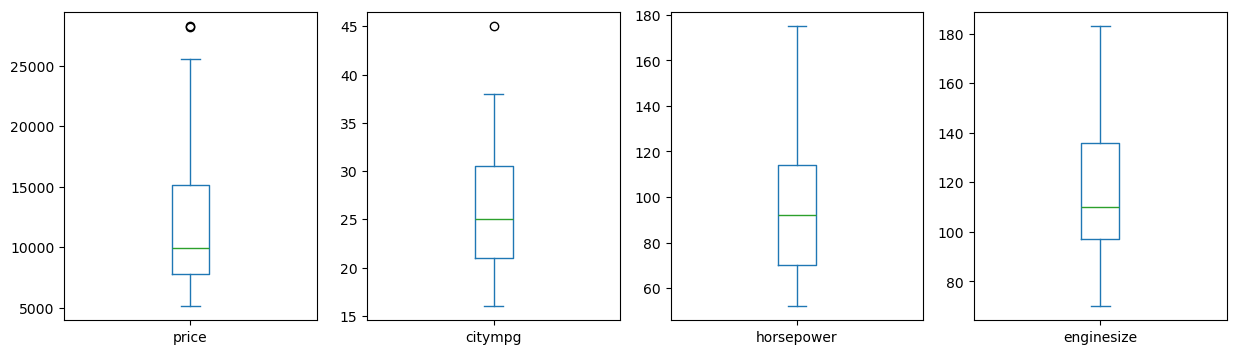

In [30]:
# Box plot after removal of outliers

plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
data_c.price.plot(kind='box')

plt.subplot(1,4,2)
data_c.citympg.plot(kind='box')

plt.subplot(1,4,3)
data_c.horsepower.plot(kind='box')

plt.subplot(1,4,4)
data_c.enginesize.plot(kind='box')

plt.show()

In [31]:
# Correlation
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_name          187 non-null    object 
 1   aspiration        187 non-null    object 
 2   boreratio         187 non-null    float64
 3   carbody           187 non-null    object 
 4   carheight         187 non-null    float64
 5   carlength         187 non-null    float64
 6   carwidth          187 non-null    float64
 7   citympg           187 non-null    int64  
 8   compressionratio  187 non-null    float64
 9   curbweight        187 non-null    int64  
 10  cylindernumber    187 non-null    object 
 11  doornumbers       187 non-null    object 
 12  drivewheels       187 non-null    object 
 13  enginelocation    187 non-null    object 
 14  enginesize        187 non-null    int64  
 15  enginetype        187 non-null    object 
 16  fuelsystem        187 non-null    object 
 17  fu

In [32]:
data2 = data_c.select_dtypes(exclude='object')

In [33]:
data2

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,price,stroke,symboling,wheelbase
0,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,13495,2.68,3,88.6
1,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,16500,2.68,3,88.6
2,2.68,52.4,171.2,65.5,19,9.0,2823,152,26,154,5000,16500,3.47,1,94.5
3,3.19,54.3,176.6,66.2,24,10.0,2337,109,30,102,5500,13950,3.40,2,99.8
4,3.19,54.3,176.6,66.4,18,8.0,2824,136,22,115,5500,17450,3.40,2,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3.78,55.5,188.8,68.9,23,9.5,2952,141,28,114,5400,16845,3.15,-1,109.1
201,3.78,55.5,188.8,68.8,19,8.7,3049,141,25,160,5300,19045,3.15,-1,109.1
202,3.58,55.5,188.8,68.9,18,8.8,3012,173,23,134,5500,21485,2.87,-1,109.1
203,3.01,55.5,188.8,68.9,26,23.0,3217,145,27,106,4800,22470,3.40,-1,109.1


In [34]:
data2.corr()

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,price,stroke,symboling,wheelbase
boreratio,1.000000,0.210258,0.587202,0.516057,-0.510460,0.022836,0.616069,0.572504,-0.527749,0.492306,-0.318072,0.489931,-0.080826,-0.150365,0.502996
carheight,0.210258,1.000000,0.539142,0.358169,-0.070974,0.272271,0.402920,0.198636,-0.128102,-0.021255,-0.317414,0.267936,-0.103601,-0.532488,0.629789
carlength,0.587202,0.539142,1.000000,0.833281,-0.615320,0.194042,0.871576,0.690104,-0.635631,0.572175,-0.273273,0.737332,0.058285,-0.314852,0.855850
carwidth,0.516057,0.358169,0.833281,1.000000,-0.586046,0.236622,0.832206,0.684730,-0.613367,0.591477,-0.199010,0.790420,0.162212,-0.210875,0.807971
citympg,-0.510460,-0.070974,-0.615320,-0.586046,1.000000,0.361405,-0.710353,-0.595711,0.967801,-0.828588,-0.125157,-0.674724,-0.026896,-0.075461,-0.431544
compressionratio,0.022836,0.272271,0.194042,0.236622,0.361405,1.000000,0.215163,0.131390,0.291977,-0.236401,-0.452874,0.191180,0.205809,-0.170455,0.304026
curbweight,0.616069,0.402920,0.871576,0.832206,-0.710353,0.215163,1.000000,0.831920,-0.749011,0.726901,-0.280230,0.851752,0.122773,-0.224656,0.791458
enginesize,0.572504,0.198636,0.690104,0.684730,-0.595711,0.131390,0.831920,1.000000,-0.611771,0.743162,-0.348013,0.741987,0.274935,-0.137392,0.586768
highwaympg,-0.527749,-0.128102,-0.635631,-0.613367,0.967801,0.291977,-0.749011,-0.611771,1.000000,-0.814865,-0.089197,-0.689874,-0.012725,-0.004620,-0.492314
horsepower,0.492306,-0.021255,0.572175,0.591477,-0.828588,-0.236401,0.726901,0.743162,-0.814865,1.000000,0.112589,0.720635,0.143429,0.062452,0.397679


<Axes: >

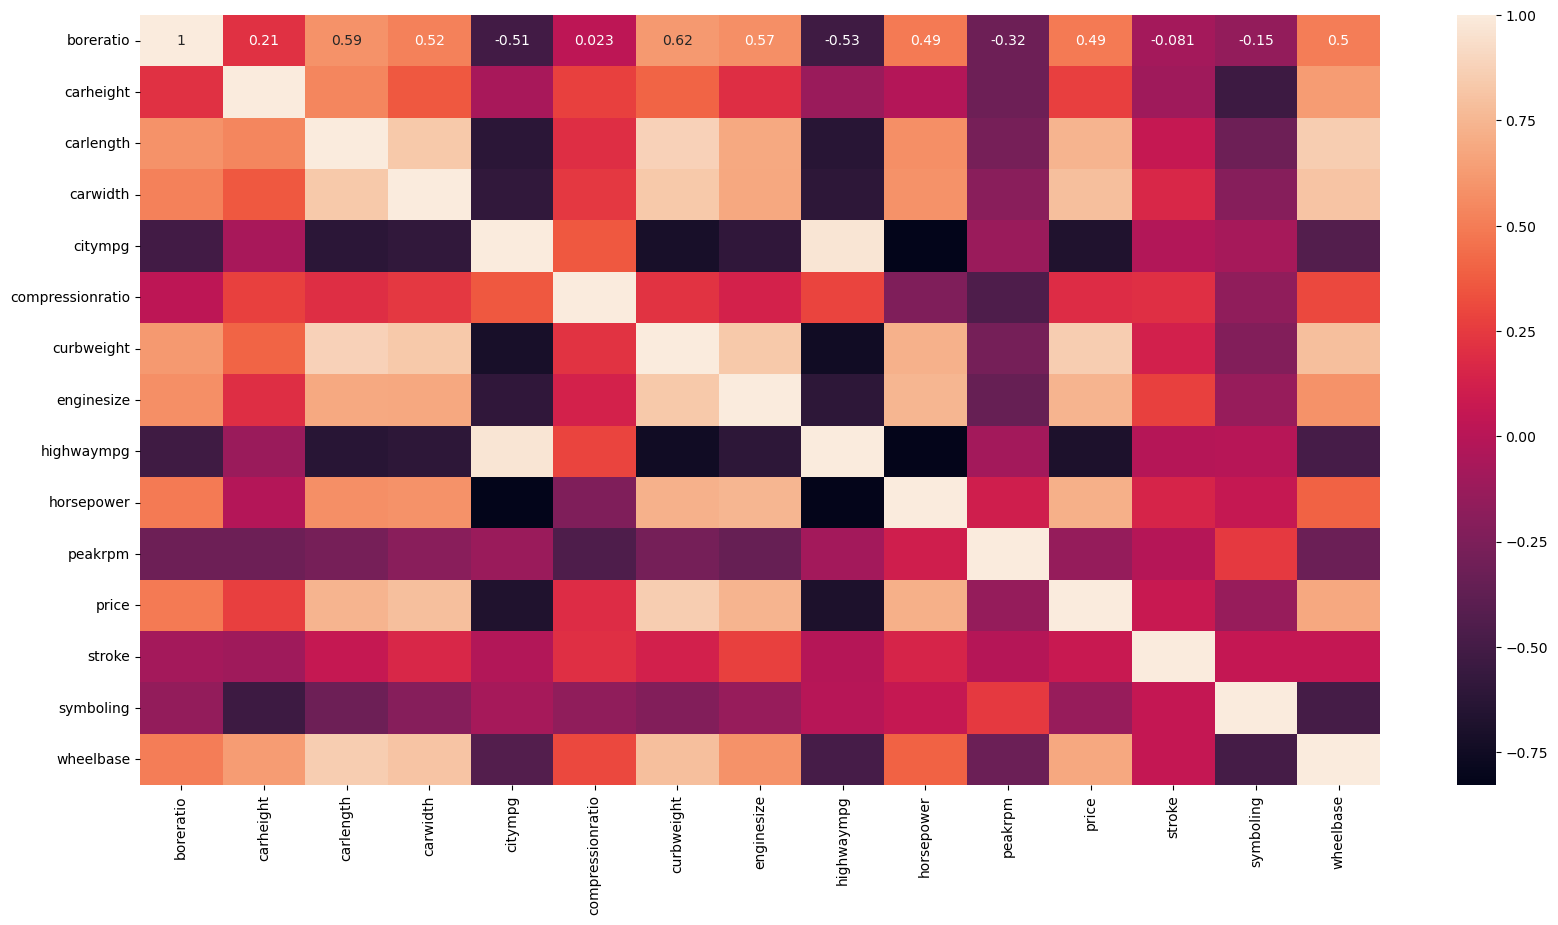

In [35]:
# Heatmap to visualize correlation

plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True)

In [36]:
# Dropping the columns with high correlation score and high negative correlation score

data2.drop(columns=['wheelbase','carwidth','carlength','highwaympg','citympg','enginesize','boreratio'],axis=1,inplace=True)

In [37]:
# updated data after removal of highly correlated colmns
data2

,carheight,compressionratio,curbweight,horsepower,peakrpm,price,stroke,symboling
0,48.8,9.0,2548,111,5000,13495,2.68,3
1,48.8,9.0,2548,111,5000,16500,2.68,3
2,52.4,9.0,2823,154,5000,16500,3.47,1
3,54.3,10.0,2337,102,5500,13950,3.40,2
4,54.3,8.0,2824,115,5500,17450,3.40,2
...,...,...,...,...,...,...,...,...
200,55.5,9.5,2952,114,5400,16845,3.15,-1
201,55.5,8.7,3049,160,5300,19045,3.15,-1
202,55.5,8.8,3012,134,5500,21485,2.87,-1
203,55.5,23.0,3217,106,4800,22470,3.40,-1


In [38]:
data_c.columns

Index(['Car_name', 'aspiration', 'boreratio', 'carbody', 'carheight',
       'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight',
       'cylindernumber', 'doornumbers', 'drivewheels', 'enginelocation',
       'enginesize', 'enginetype', 'fuelsystem', 'fueltypes', 'highwaympg',
       'horsepower', 'peakrpm', 'price', 'stroke', 'symboling', 'wheelbase'],
      dtype='object')

In [40]:
data3 = data_c[[ 'carheight', 'compressionratio', 'curbweight', 'horsepower', 'peakrpm',
       'price', 'stroke', 'symboling','Car_name', 'aspiration','cylindernumber', 'doornumbers', 'drivewheels', 'enginelocation','enginetype', 'fuelsystem', 'fueltypes']]

In [41]:
data3.columns

Index(['carheight', 'compressionratio', 'curbweight', 'horsepower', 'peakrpm',
       'price', 'stroke', 'symboling', 'Car_name', 'aspiration',
       'cylindernumber', 'doornumbers', 'drivewheels', 'enginelocation',
       'enginetype', 'fuelsystem', 'fueltypes'],
      dtype='object')

In [ ]:
# Normalization:
# Is used to rescale the data/feature having very vast range to bring it in between 0-1
# That it helps to analyse the data by checking the density graph


# Standardization:
# Is used to rescale the data/features having very vast range by implementing a certain condition : a. Normal distribution, b. Mean =0 and Std.Dev= 1
# It helps us to analyse the data by checking the normal distribution graph

In [ ]:
# Implementing Normalization here:

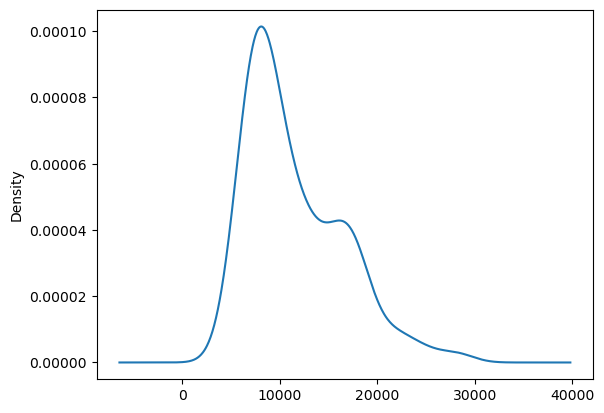

In [42]:
data3.price.plot.density()
plt.show()

In [44]:
# Implementing normalization on the target column 'price'
log_price=np.log(data3['price'])

In [45]:
log_price

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 187, dtype: float64

In [46]:
# inserting the values of log_price in the new column

data3['log_price']=log_price

C:\Users\rudra\AppData\Local\Temp\ipykernel_16856\1581140533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['log_price']=log_price


In [47]:
# removal of earlier column 'price'

data_normal=data3.drop(['price'],axis=1)
data_normal

,carheight,compressionratio,curbweight,horsepower,peakrpm,stroke,symboling,Car_name,aspiration,cylindernumber,doornumbers,drivewheels,enginelocation,enginetype,fuelsystem,fueltypes,log_price
0,48.8,9.0,2548,111,5000,2.68,3,alfa-romeo,std,four,two,rwd,front,dohc,mpfi,gas,9.510075
1,48.8,9.0,2548,111,5000,2.68,3,alfa-romeo,std,four,two,rwd,front,dohc,mpfi,gas,9.711116
2,52.4,9.0,2823,154,5000,3.47,1,alfa-romeo,std,six,two,rwd,front,ohcv,mpfi,gas,9.711116
3,54.3,10.0,2337,102,5500,3.40,2,audi,std,four,four,fwd,front,ohc,mpfi,gas,9.543235
4,54.3,8.0,2824,115,5500,3.40,2,audi,std,five,four,4wd,front,ohc,mpfi,gas,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,55.5,9.5,2952,114,5400,3.15,-1,volvo,std,four,four,rwd,front,ohc,mpfi,gas,9.731809
201,55.5,8.7,3049,160,5300,3.15,-1,volvo,turbo,four,four,rwd,front,ohc,mpfi,gas,9.854560
202,55.5,8.8,3012,134,5500,2.87,-1,volvo,std,six,four,rwd,front,ohcv,mpfi,gas,9.975110
203,55.5,23.0,3217,106,4800,3.40,-1,volvo,turbo,six,four,rwd,front,ohc,idi,diesel,10.019936


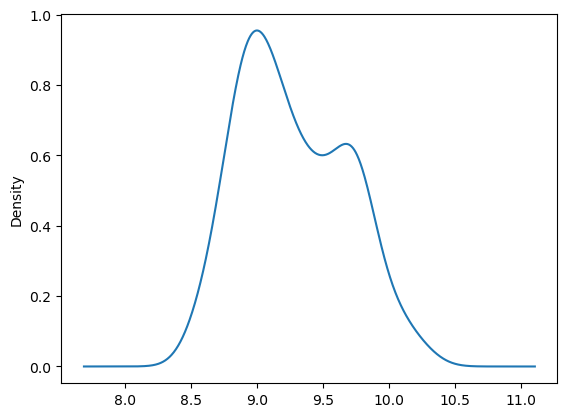

In [48]:
# checking the density after normalization

data3.log_price.plot.density()
plt.show()

In [49]:
# VIF - Variance Inflation Factor

# It is  a method to check multi-collinearity

In [50]:
data_normal.columns

Index(['carheight', 'compressionratio', 'curbweight', 'horsepower', 'peakrpm',
       'stroke', 'symboling', 'Car_name', 'aspiration', 'cylindernumber',
       'doornumbers', 'drivewheels', 'enginelocation', 'enginetype',
       'fuelsystem', 'fueltypes', 'log_price'],
      dtype='object')

In [51]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carheight         187 non-null    float64
 1   compressionratio  187 non-null    float64
 2   curbweight        187 non-null    int64  
 3   horsepower        187 non-null    int64  
 4   peakrpm           187 non-null    int64  
 5   stroke            187 non-null    float64
 6   symboling         187 non-null    int64  
 7   Car_name          187 non-null    object 
 8   aspiration        187 non-null    object 
 9   cylindernumber    187 non-null    object 
 10  doornumbers       187 non-null    object 
 11  drivewheels       187 non-null    object 
 12  enginelocation    187 non-null    object 
 13  enginetype        187 non-null    object 
 14  fuelsystem        187 non-null    object 
 15  fueltypes         187 non-null    object 
 16  log_price         187 non-null    float64
dtypes:

In [52]:
# implementing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables=data_normal[['symboling','carheight', 'curbweight', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm']]

In [53]:
# creating a dataframe

vif=pd.DataFrame()

In [54]:
# creating a column in dataframe by the name of vif and inserting values in it with the vif score

vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [55]:
# creating another column for features

vif['Features']=variables.columns

In [56]:
vif

,VIF,Features
0,1.792987,symboling
1,298.423135,carheight
2,175.462444,curbweight
3,112.216077,stroke
4,13.470449,compressionratio
5,56.226427,horsepower
6,142.824380,peakrpm


In [57]:
# storing the columns with low vif score

variables=data_normal[['symboling','horsepower','peakrpm']]

In [58]:
# dropping the columns having high vif score

data_multi=data_normal.drop(['carheight','stroke','compressionratio','curbweight'],axis=1)

In [59]:
data_multi

,horsepower,peakrpm,symboling,Car_name,aspiration,cylindernumber,doornumbers,drivewheels,enginelocation,enginetype,fuelsystem,fueltypes,log_price
0,111,5000,3,alfa-romeo,std,four,two,rwd,front,dohc,mpfi,gas,9.510075
1,111,5000,3,alfa-romeo,std,four,two,rwd,front,dohc,mpfi,gas,9.711116
2,154,5000,1,alfa-romeo,std,six,two,rwd,front,ohcv,mpfi,gas,9.711116
3,102,5500,2,audi,std,four,four,fwd,front,ohc,mpfi,gas,9.543235
4,115,5500,2,audi,std,five,four,4wd,front,ohc,mpfi,gas,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,5400,-1,volvo,std,four,four,rwd,front,ohc,mpfi,gas,9.731809
201,160,5300,-1,volvo,turbo,four,four,rwd,front,ohc,mpfi,gas,9.854560
202,134,5500,-1,volvo,std,six,four,rwd,front,ohcv,mpfi,gas,9.975110
203,106,4800,-1,volvo,turbo,six,four,rwd,front,ohc,idi,diesel,10.019936


In [60]:
# ENCODING - conversion of categorical variables into numerical

In [61]:
data_dummies=pd.get_dummies(data_multi)

In [62]:
data_dummies

,horsepower,peakrpm,symboling,log_price,Car_name_Nissan,Car_name_alfa-romeo,Car_name_audi,Car_name_bmw,Car_name_buick,Car_name_chevrolet,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltypes_diesel,fueltypes_gas
0,111,5000,3,9.510075,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,111,5000,3,9.711116,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,154,5000,1,9.711116,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,102,5500,2,9.543235,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,115,5500,2,9.767095,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,5400,-1,9.731809,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
201,160,5300,-1,9.854560,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
202,134,5500,-1,9.975110,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
203,106,4800,-1,10.019936,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [63]:
# MODEL BUILDING

In [64]:
y = data_dummies['log_price']
x1= data_dummies.drop(['log_price'],axis=1)
# x=sm.add_constant(pd.DataFrame(x1))

In [65]:
y

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: log_price, Length: 187, dtype: float64

In [66]:
x1

,horsepower,peakrpm,symboling,Car_name_Nissan,Car_name_alfa-romeo,Car_name_audi,Car_name_bmw,Car_name_buick,Car_name_chevrolet,Car_name_dodge,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltypes_diesel,fueltypes_gas
0,111,5000,3,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,111,5000,3,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,154,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,102,5500,2,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,115,5500,2,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,5400,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
201,160,5300,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
202,134,5500,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
203,106,4800,-1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [70]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [71]:
model=LinearRegression()

In [72]:
model

LinearRegression()

In [73]:
model.fit(x1_train,y_train)

LinearRegression()

In [74]:
y_pred=model.predict(x1_test)

In [75]:
y_pred

array([ 9.82351393,  8.85007104,  9.2949152 ,  8.91231654,  9.6161439 ,
        8.96576368,  9.34101132,  9.2922025 ,  8.88937879,  9.2170264 ,
        9.20315413,  8.97577996,  9.10595719,  8.93919058,  9.08332951,
        9.055491  ,  9.10625835,  9.6563844 ,  8.82892688,  9.07908734,
        8.97046595,  9.80944818,  9.70270227,  9.22139432,  8.98217684,
        9.2922025 , 10.14582065,  8.87667855,  8.8298491 ,  9.74003527,
        8.71950512,  9.09671814,  8.85007104,  9.17386685,  8.86848662,
        9.01161805,  9.5175741 ,  8.90919881])

In [76]:
y_test

203    10.019936
91      8.802222
63      9.286838
155     9.080004
179     9.680219
19      8.747511
88      9.135509
172     9.779567
140     8.936298
193     9.416541
176     9.296335
50      8.555452
183     8.984067
35      8.894944
59      9.087608
20      8.791030
184     8.986572
195     9.504129
98      9.017847
23      8.981807
142     8.958669
136     9.806426
5       9.632335
166     9.163039
28      9.096163
170     9.323580
9       9.790263
156     8.844769
153     8.841882
180     9.660779
22      8.760453
190     9.208338
89      8.612322
79      8.947546
81      9.047704
40      9.239414
111     9.653743
163     8.994421
Name: log_price, dtype: float64

In [77]:
model.score(x1_test,y_test)

0.7633974863253231

In [78]:
r2s=r2_score(y_test,y_pred)

In [79]:
r2s

0.7633974863253231